<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/Photonic_Crystals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstact: This Research Project Mainly focuses on How dark matter partcles would potentially interact with a photonic crystal. The main objective of this Project is to verify this https://arxiv.org/abs/2401.17260v1 paper - Dark Matter Searches on a Photonic Chip.

In [ ]:
pip install legume-gme

In [ ]:
import numpy as np
import legume
from legume import GuidedModeExp, PhotCryst, Lattice, gme
from legume.minimize import Minimize
import matplotlib.pyplot as plt
import time
import autograd.numpy as npa
from autograd import grad, value_and_grad

Creating a photonic crystal

```
# This is formatted as code
```



Initializations

In [ ]:
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1.0, 1.0
gmax = 10
c = 1
numeig = 10

Photonic Structure

In [ ]:
lattice = legume.Lattice([1/10.,0],[0,1/10.])
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)

Define the path in the Brillouin zone

In [ ]:
path = lattice.bz_path([[0, 0], [4 * 2 * np.pi, 0]], [10])

Printing Kpoints

In [ ]:
print("K-points path:", path['kpoints'])

K-points path: [[ 0.          2.51327412  5.02654825  7.53982237 10.05309649 12.56637061
  15.07964474 17.59291886 20.10619298 22.61946711 25.13274123]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]


Simulation options

In [ ]:
options = {'gmode_inds': [1, 3, 5, 7, 9],  # Take only the modes with H in the xy-plane
           'numeig': numeig,
           'verbose': True
           }

calling the Guided mode expansion object from legume

In [ ]:
gme = GuidedModeExp(phc, gmax=gmax)

# Running GME

In [ ]:
npw = np.shape(gme.gvec)[1]  # Number of plane waves in the expansion
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

Number of reciprocal lattice vectors in the expansion: npw = 5


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'      │ 0.238    │ │██████████----------│   51% │
│ Inverse matrix of Fourier-space permittivity             │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver          │ 0.030    │ │█-------------------│    6% │
│ Creating GME matrix                                      │ 0.174    │ │███████-------------│   37% │
├──────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 11 k-points  │ 0.466    │ │████████████████████│  100% │
└──────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes        ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 110 eigenmodes │ 0.933    │
└─────────────────────────────────────────────────────────────────┴──────────┘

Visualization of structure

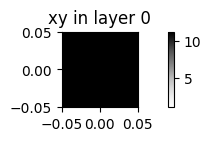

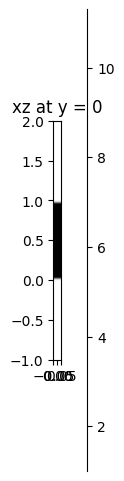

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


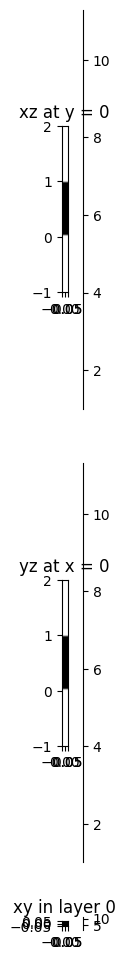

In [ ]:
legume.viz.structure(phc, figsize=2)
legume.viz.structure(phc, xz=True, xy=False, figsize=1)
legume.viz.structure(phc, yz=True, xz=True, figsize=1)

Plotting the bands

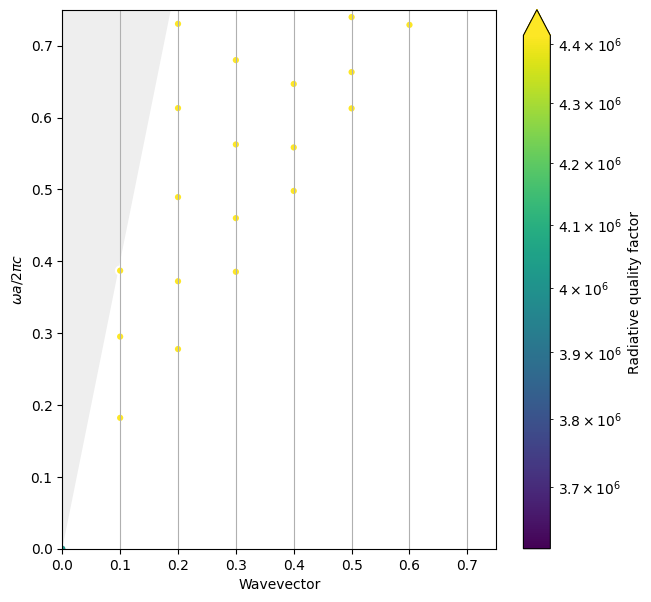

In [ ]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

# Plot fields for different configurations

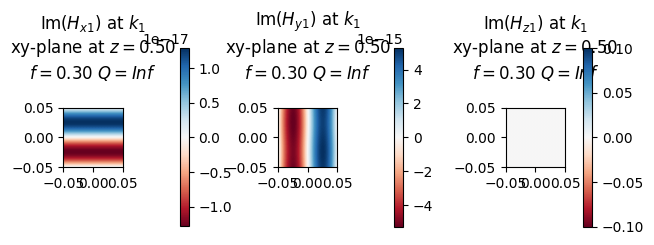

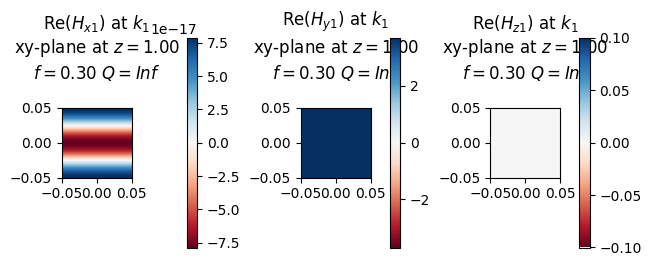

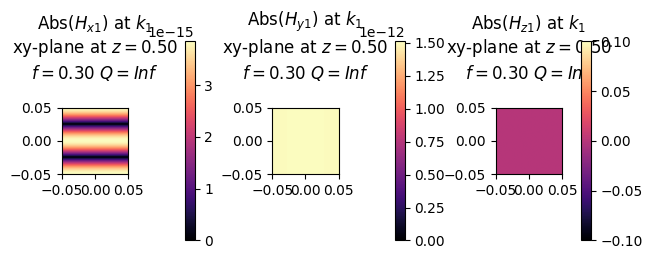

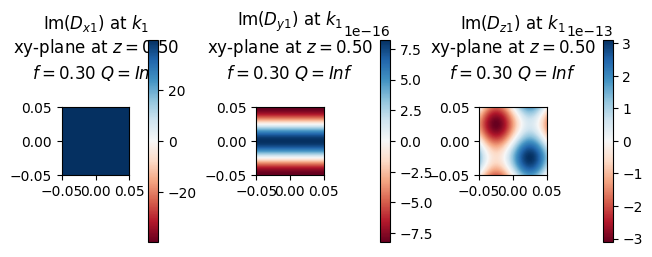

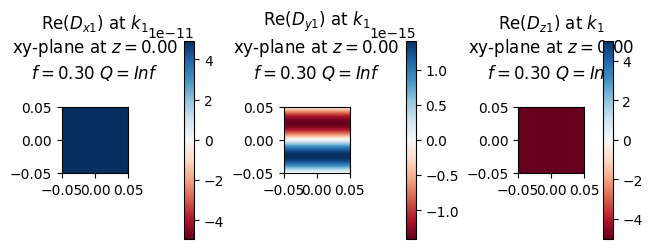

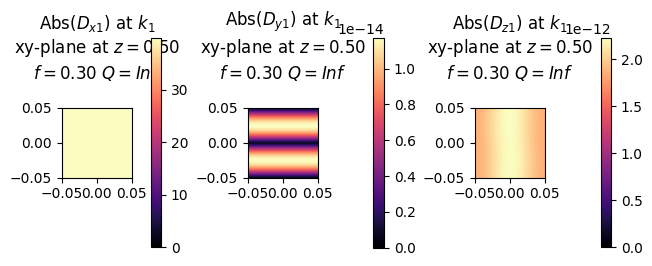

In [ ]:

legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='im')
legume.viz.field(gme, 'H', 1, 1, z=D, periodic=True, val='re')
legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='abs')
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='im')
legume.viz.field(gme, 'D', 1, 1, z=0, periodic=True, val='re')
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='abs')
plt.show()

Verification of my data with an actual data set
# Given simulation results for n1, n2, and n3

In [ ]:

n1_data = np.array([
    [0.05656324478351993, 0.019112207151664506],
    [0.2263314060641448, 0.08569667077681853],
    [0.7355051783559106, 0.22996300863131935],
    [1.2163929712042465, 0.36683107274969173],
    [1.6171400603306434, 0.48397040690505544],
    [2.2300465187883347, 0.6627620221948212],
    [2.8005123892764257, 0.8255240443896423],
    [3.856600715427886, 1.1350184956843403],
    [3.9933308062433666, 1.1769420468557337]
])

n2_data = np.array([
    [0.20294275269810447, 0.157213316892725],
    [0.6790929780302934, 0.28298397040690504],
    [1.16937166957863, 0.40628853267570864],
    [1.994417164459821, 0.6381011097410603],
    [2.7440246667218577, 0.846485819975339],
    [3.545513035572424, 1.0782983970406907],
    [3.9910389970648, 1.2040690505548703]
])

n3_data = np.array([
    [0.3446573106243802, 0.31504315659679416],
    [0.811306258614255, 0.40752157829839697],
    [1.3392763518115902, 0.530826140567201],
    [1.8955498526590373, 0.6689272503082615],
    [2.480135475259936, 0.8255240443896423],
    [3.479602462605606, 1.099260172626387],
    [3.988767520794031, 1.2398273736128238]
])

MY Plot

<Axes: xlabel='Wave vector', ylabel='Frequency $\\omega a /(2\\pi c)$'>

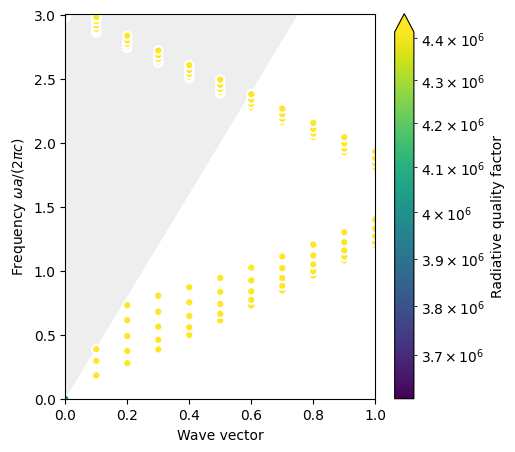

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 5))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)

Super imposed plot

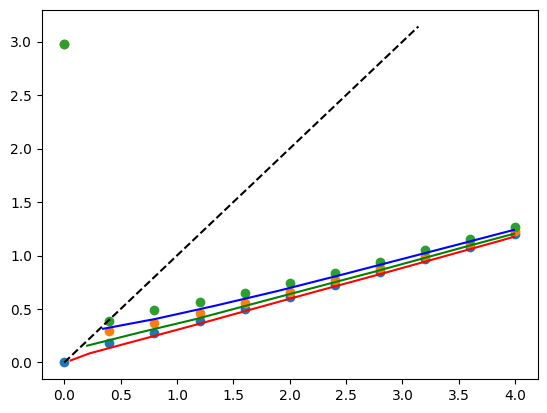

In [ ]:
# Plot the simulation results for n1, n2, and n3 over lapping the previous results
ax.set_ylim([0, 1.5])
ax.set_xlim([0, np.pi])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.legend()
ax.xaxis.grid(True)
plt.show()

k_values = path['kpoints'][0]/(2.*np.pi)
plt.plot(k_values, gme.freqs.transpose()[0],'o')
plt.plot(k_values, gme.freqs.transpose()[1],'o')
plt.plot(k_values, gme.freqs.transpose()[2],'o')
# Adding the given data points for n1, n2, and n3 as lines
plt.plot(n1_data[:, 0], n1_data[:, 1], 'r-', label='n1 Data')
plt.plot(n2_data[:, 0], n2_data[:, 1], 'g-', label='n2 Data')
plt.plot(n3_data[:, 0], n3_data[:, 1], 'b-', label='n3 Data')

# Plot the light line
k_values = np.linspace(0, np.pi, 100)
light_line = k_values
plt.plot(k_values, light_line, 'k--', label='Light Line $\omega = ck$')
plt.show()

New lattice for integral

In [ ]:
# Simulation parameters
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1, 1
gmax = 10
kind = 0
mind = 0
c = 1

# Photonic crystal structure
lattice = Lattice([1 / 10., 0], [0, 1 / 10.])
phc = PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
# Simulation options
numeig = 10
options = {'gmode_inds': [1, 5, 9, 13, 17],  # 'gmode_inds': [1, 3, 5, 7, 9],
           'numeig': numeig,
           'verbose': True
           }

gme = GuidedModeExp(phc, gmax=gmax)

npw = np.shape(gme.gvec)[1]
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')
kpoints = np.array([[0], [0]])
gme.run(kpoints=kpoints, **options)

Number of reciprocal lattice vectors in the expansion: npw = 5


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'      │ 0.009    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity             │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver          │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                      │ 0.011    │ │█████████-----------│   46% │
├──────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points   │ 0.024    │ │████████████████████│  100% │
└──────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 5 plane waves and 5 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.124    │
└────────────────────────────────────────────────────────────────┴──────────┘

Integral function

In [ ]:
def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, c, eps_j, g, d_j, g_hat, ec_area):
    # Debugging: Print shapes
    print(f"g shape: {g.shape},  X_j shape: {X_j.shape}, g_hat[0] shape: {g_hat[0].shape}")
    N = num_layers - 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
        # return c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j * g_hat + (B_j - A_j) * g * z_hat)
    else:
        g_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return (ec_area * np.array([g_hat_coef * g_hat[0], g_hat_coef * g_hat[1], z_hat_coef]))


# Debugging: Print the guided mode arrays


In [ ]:
print(gme.g_array.__sizeof__())
print(gme.omegas_tm.__sizeof__())
print(gme.coeffs_tm.__sizeof__())
print(gme.gvec.__sizeof__())
print(gme.delta_gx.__sizeof__())
print(gme.eigvecs.__sizeof__())

72
72
72
128
24
72


# Ensure guided modes are computed

In [ ]:
tm_modes = [mode for mode in range(len(gme.freqs[0])) if mode % 2 == 1]

Print

In [ ]:
print("Guided modes were found.")
print(f'Number of TM modes: {len(tm_modes)}')
print("TM modes available:", tm_modes)

Guided modes were found.
Number of TM modes: 5
TM modes available: [1, 3, 5, 7, 9]


Chosing a mode

In [ ]:
tm_mode_index = tm_modes[0]

Validation of index

gk calculation

In [ ]:
k = gme.kpoints[:, kind]
kx, ky = k[0], k[1]
print("kx,ky=", kx, "\t", ky)
gkx = gme.gvec[0, :] + kx + gme.delta_gx
gky = gme.gvec[1, :] + ky
print("gkx,gky = ", gkx, "\t", gky)
gk = np.sqrt(np.square(gkx) + np.square(gky))
print("gk = ", gk)

kx,ky= 0 	 0
gkx,gky =  [-6.28318531e+01  1.00000000e-15  1.00000000e-15  1.00000000e-15
  6.28318531e+01] 	 [  0.         -62.83185307   0.          62.83185307   0.        ]
gk =  [6.28318531e+01 6.28318531e+01 1.00000000e-15 6.28318531e+01
 6.28318531e+01]


# Unit vectors in the propagation direction; we add a tiny component in the x-direction to avoid problems at gk = 0

In [ ]:
pkx = gkx / gk
pky = gky / gk

# Unit vectors in-plane orthogonal to the propagation direction

In [ ]:
qkx = gky / gk
qky = -gkx / gk

# Get the coefficients for the TM mode

In [ ]:
omega = gme.freqs[kind][mind] * 2 * np.pi
evec = gme.eigvecs[kind][:, mind]
print("evec = ", evec.shape)
num_layers = gme.eps_array.size
print("number of layers = ", num_layers)
print("d_array = ", gme.d_array)
count = 0
for im1 in range(gme.gmode_include[kind].size):
  mode1 = gme.gmode_include[kind][im1]
  (indmode, oms, As, Bs, chis) = \
            gme._get_guided(gk, kind, mode1)
  print(As.shape, "\t", Bs.shape, "\t", chis.shape)
    # Check the valid mode index
total_integral = 0.
for lind in range(num_layers):
      eps_j = gme.eps_array[lind]
      if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
      else:
            d_j = gme.d_array[lind - 1]

      print("eps_j = ", eps_j)
      g_hat = np.array([pkx[indmode], pky[indmode]])
      g_norm = gk[indmode]
      res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, c, eps_j, g_norm, d_j,
                           g_hat, gme.phc.lattice.ec_area)
      print("result=", res, "\n")
      vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
      total_integral += np.array([np.abs(np.dot(vals, Ej_integral)) for Ej_integral in res])
      count += gme.modes_numg[kind][im1]
print("Final result = ", total_integral)

evec =  (21,)
number of layers =  3
d_array =  [1.]
(3, 5) 	 (3, 5) 	 (3, 5)
(3, 4) 	 (3, 4) 	 (3, 4)
(3, 4) 	 (3, 4) 	 (3, 4)
(3, 4) 	 (3, 4) 	 (3, 4)
(3, 4) 	 (3, 4) 	 (3, 4)
eps_j =  1.0
g shape: (4,),  X_j shape: (4,), g_hat[0] shape: (4,)
result= [[ 3.09167663e-24+1.24266354e+03j -4.92055618e-41-1.97776045e-14j
  -4.92055618e-41-1.97776045e-14j -3.09167663e-24-1.24266354e+03j]
 [ 0.00000000e+00+0.00000000e+00j  3.09167663e-24+1.24266354e+03j
  -3.09167663e-24-1.24266354e+03j  0.00000000e+00+0.00000000e+00j]
 [-1.31449829e+03+3.27039744e-24j -1.31449829e+03+3.27039744e-24j
  -1.31449829e+03+3.27039744e-24j -1.31449829e+03+3.27039744e-24j]] 

eps_j =  11.3
g shape: (4,),  X_j shape: (4,), g_hat[0] shape: (4,)
result= [[     0.       -7.83624786e-11j      0.       +1.24717758e-27j
       0.       +1.24717758e-27j      0.       +7.83624786e-11j]
 [     0.       +0.00000000e+00j      0.       -7.83624786e-11j
       0.       +7.83624786e-11j      0.       +0.00000000e+00j]
 [-11671.719

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │█████---------------│   27% │
│ Inverse matrix of Fourier-space permittivity              │ 0.010    │ │█████████-----------│   45% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    8% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.021    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-3.4957501893098575e-12+2.6991974432162945e-17j)
(-1.3211436004345331e-18-1.6631073939220434e-19j)
(-3.7357642795885786e-18+4.1521656013656766e-18j)
(-2.1676663594740364e-17-6.1317577355167774e-18j)
(0.0045707829487914315-3.2013431648168687e-21j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │██████--------------│   32% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    9% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-5.958152318893256e-12+2.4309191656040795e-17j)
(-4.482451501474309e-18-4.247005191377224e-19j)
(2.1271470163223677e-17-2.208197160726292e-18j)
(1.1472998184670298e-17-7.75322558655009e-18j)
(0.0024236924363691048-2.2960247804551677e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(2.2134125717255875e-11-1.4553729170410725e-17j)
(-5.09583960167605e-19+1.678618357601521e-20j)
(5.3881409715967864e-18+6.98908556479876e-18j)
(-2.066411824329711e-18+7.081329698329102e-18j)
(-2.489879499621889e-05+3.313241553603014e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   42% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-2.0921038692940068e-11+1.9118983973192312e-17j)
(-3.4104378371217156e-18+7.438057560740031e-20j)
(5.3557555652789346e-18-1.0267173123376947e-17j)
(2.663947074681892e-17-6.245352493304141e-18j)
(0.002722599067726551-2.64436656343703e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │██████--------------│   31% │
│ Inverse matrix of Fourier-space permittivity              │ 0.014    │ │█████████-----------│   46% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    6% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.031    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-5.93203523580998e-11+1.1207234430153746e-17j)
(1.276413452819821e-17+3.6945153584792794e-19j)
(-1.5898533883408294e-17-4.982598721638811e-19j)
(1.371825535137186e-17+1.1071183371641393e-17j)
(-0.005636291206834392+2.6145923810350567e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │██████--------------│   33% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.004    │ │██████--------------│   31% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.306395186509473e-10-1.9359055701755007e-17j)
(9.944436615270794e-18+2.5059163285501687e-19j)
(6.048110195012054e-18-8.300556506730112e-18j)
(-3.8948750008746335e-17+1.017658041934715e-17j)
(0.00875257556967464-5.503782235181975e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   40% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   13% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-9.940447072356871e-11-3.393574442131688e-17j)
(-1.27905574002069e-17-2.329266042789252e-19j)
(1.0305305989237559e-16+7.701441475783058e-18j)
(1.8656302615110162e-17+5.488407985805177e-18j)
(-0.012074345321088658+2.608352656175687e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │██████████----------│   50% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │████----------------│   21% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.009    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.215729028343181e-10+1.216554094254694e-17j)
(-7.346690827216376e-17-2.044912334573242e-19j)
(4.553081684837834e-17+9.474486963116228e-18j)
(-1.1559933391692078e-17+7.281742464145018e-18j)
(-0.015618490848241729-3.083630460883708e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │███-----------------│   19% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │█-------------------│    5% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   15% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.62332922288392e-10+2.946031702444723e-17j)
(1.5187866830595403e-16+1.0468501259690318e-19j)
(2.4906307887555998e-17+6.1036834340075464e-18j)
(1.826086930821674e-17-1.4170208788660683e-17j)
(0.019417780478068098-1.5974450378180423e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │█████████████-------│   65% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   13% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.988382772541633e-11-1.0302689106806405e-17j)
(-9.734940987201891e-18+4.222195833258871e-19j)
(-3.925665068286951e-17+7.273839194392417e-18j)
(2.628634276789311e-17-3.0499543690031515e-18j)
(-0.023524805017993023-5.792971787185364e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(2.265577451013003e-11+2.089261824515296e-17j)
(-1.185481026149913e-16+7.322085316949625e-20j)
(6.644301272364231e-17-7.790972546562506e-18j)
(-1.1822527318828197e-16+7.458799298453253e-18j)
(-0.028007031898712863-1.22759669220694e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │█-------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.009    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.879290578147449e-10+8.851612137470211e-18j)
(-6.95336750388701e-17+1.4578565856032214e-19j)
(-6.78745378176738e-17+7.710052501035891e-18j)
(1.0940932593539247e-16+7.428601730443321e-18j)
(-0.03291352782327365-1.6546831669495535e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.003    │ │█████---------------│   26% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.921241482750744e-10+1.235523100145489e-17j)
(2.1867568874392392e-16-2.0791112837214883e-19j)
(-7.497825229780305e-17+1.0810729347555728e-17j)
(-1.6548777192381066e-16-3.7897947852464904e-18j)
(0.038195116176057975+3.0776155714135015e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   40% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.004    │ │██████--------------│   35% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.011    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.6653047022807033e-10-1.253251565389901e-17j)
(-4.099319857348295e-17+8.250902803752549e-20j)
(-8.105625280605064e-16+1.2335706532057303e-17j)
(2.5842231310329645e-17-8.162780102684796e-18j)
(-0.04358114101125186+5.670244170742547e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.9175455686306932e-18+1.6776811746230585e-19j)
(6.918913362907558e-16-1.0493654883451438e-17j)
(-4.442703515597797e-16-7.59468835449795e-18j)
(0.04846199489011772-3.543838512100806e-19j)
(0.03790487726366536-1.4515259715174174e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.05186544053477688+5.05701047702599e-19j)
(1.3950219505708324e-15-1.0089082199406754e-19j)
(-8.552146739513539e-16-9.867055347245345e-18j)
(6.516371328897976e-17-6.945440642284404e-18j)
(-0.024748349868071895-3.829448408864452e-22j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │██████████----------│   55% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.009    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(0.052552478818819755-3.0280668319390563e-19j)
(-1.2529370111987748e-16-9.844407171237896e-18j)
(-2.551607111958713e-16+1.0847532633567834e-17j)
(1.365685013249183e-16-1.5133374748642832e-19j)
(0.006751128015986351+1.5336284548064008e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.012    │ │████████████--------│   63% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   11% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.019    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(0.0490403179082839+4.2011815128468765e-20j)
(-1.1366554677195326e-16-6.5226746901453556e-18j)
(9.923815269181371e-17+1.905466541426722e-17j)
(1.0055790147307422e-17-1.0886244377455532e-19j)
(6.655318459280204e-17+5.09583960167606e-18j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │███████████---------│   58% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   15% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.03900179669666985+3.714494709269747e-19j)
(-1.131461103921402e-17-1.0629543939496135e-17j)
(-6.26304840247484e-17-1.5340364549045555e-17j)
(1.781656512586e-17+1.5159154697145335e-18j)
(-2.6599853839807796e-16+2.2648176007449135e-18j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████████---------│   60% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.016042320217280664-4.85264641711526e-19j)
(-3.163110875490158e-17+1.3528510468449618e-17j)
(5.5014059028955467e-17+1.7650478501805366e-17j)
(8.986796239755824e-17+2.6716435157625846e-19j)
(1.62943625284546e-16-9.512233923128639e-19j)
(20, 5)


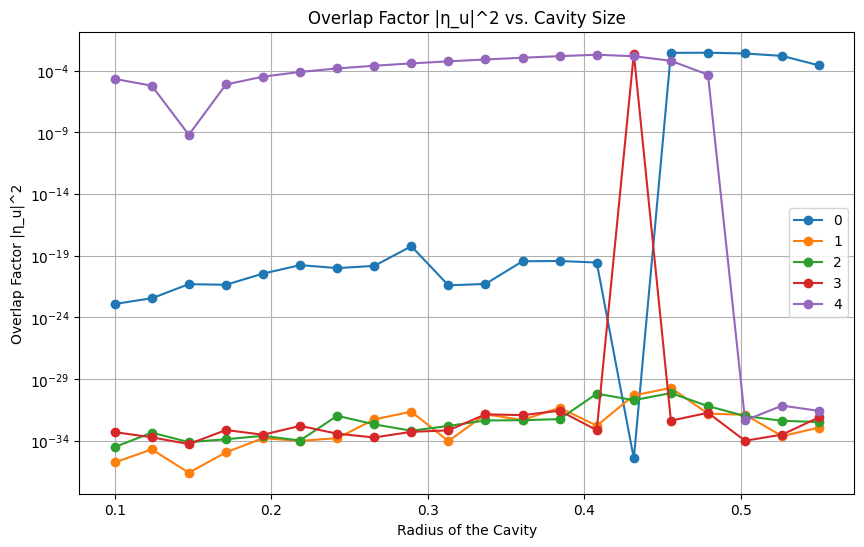

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import autograd.numpy as npa
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 0.6, 0.3, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')


# Define single-hole PhC cavity
def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    return phc


# Solve for a cavity defined by shifts dx, dy
def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)


# Function to calculate the overlap factor
def calculate_overlap_factor(gme, K, m, Nx_grid=50, Ny_grid=50, Nz_grid=50):
    x_grid = np.linspace(-0.5, 0.5, Nx_grid)
    y_grid = np.linspace(-0.5, 0.5, Ny_grid)
    z_grid = np.linspace(-2 * D, 3 * D, Nz_grid)

    integral_numerator = 0.0
    integral_denominator = 0.0

    for z in z_grid:
        field_data_e = gme.get_field_xy('e', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        field_data_d = gme.get_field_xy('d', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        Ez = field_data_e['z']
        Dz = field_data_d['z']

        phase_factor = 1 #np.exp(-1j * (K[0] * x_grid[:, None] + K[1] * y_grid[None, :]))

        integral_numerator += np.sum(Ez * phase_factor) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])
        integral_denominator += np.sum(Ez * Dz) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])

    integral_numerator *= (z_grid[1] - z_grid[0])
    integral_denominator *= (z_grid[1] - z_grid[0])

    V_u = (x_grid[-1] - x_grid[0]) * (y_grid[-1] - y_grid[0]) * (z_grid[-1] - z_grid[0])

    eta_u = (integral_numerator / V_u)# / np.sqrt(integral_denominator / V_u)
    print(eta_u)

    return eta_u


# Function to generate eta_u vs. radius graph
def generate_eta_u_vs_radius_graph(K, radii):
    eta_u_values = []

    for radius in radii:
        global lattice, phc
        lattice = legume.Lattice(a1, a2)
        phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
        phc.add_layer(d=D, eps_b=eps_b)
        phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=radius, x_cent=0., y_cent=0))

        gme, _ = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        # eta_u = calculate_overlap_factor(gme, K,m=0)

        eta_u = np.array([np.abs(calculate_overlap_factor(gme, K,m=m)) for m in range(5)])
        eta_u_values.append(eta_u**2)

    return radii, np.array(eta_u_values)  # Return the radii and eta_u_values


# Define the range of radii
radii = np.linspace(0.1, 0.55, 20)  # Example: radii from 0.1 to 0.5

# Example Bloch wavevector
K = np.array([0, 0])

# Generate data for the plot
radii_values, eta_u_values = generate_eta_u_vs_radius_graph(K, radii)




(20, 5)


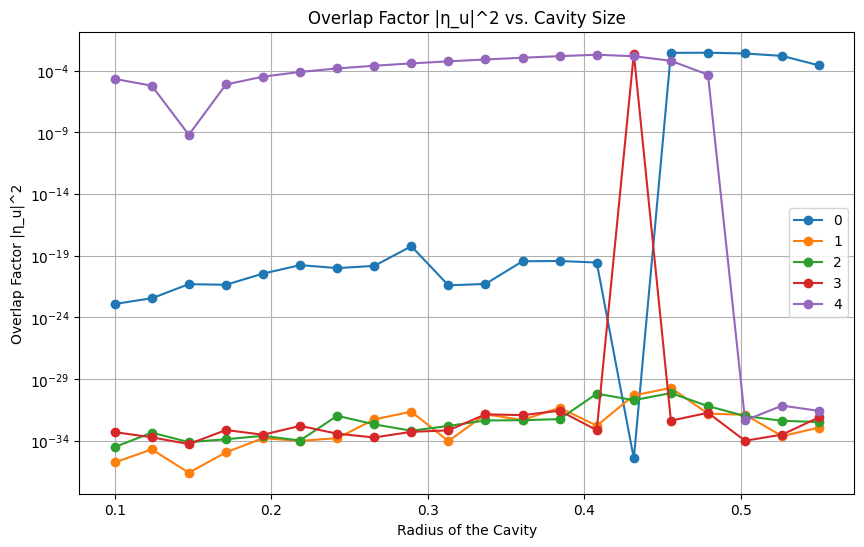

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values.shape)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii_values, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|^2')
plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()